In [2]:
pip install torch torchvision


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
!dir


 Volume in drive C has no label.
 Volume Serial Number is 8029-92CC

 Directory of C:\Users\Admin

24/06/2025  06:51 PM    <DIR>          .
24/06/2025  06:51 PM    <DIR>          ..
25/04/2025  07:38 PM    <DIR>          .android
21/06/2025  03:43 PM    <DIR>          .ipynb_checkpoints
19/06/2025  04:46 PM    <DIR>          .ipython
24/06/2025  03:41 PM    <DIR>          .jupyter
19/06/2025  04:51 PM    <DIR>          .matplotlib
14/03/2025  01:21 PM                46 .python_history
19/01/2025  06:41 PM    <DIR>          .vscode
24/12/2024  04:45 AM    <DIR>          3D Objects
27/10/2019  10:06 PM         7,077,973 AB_NYC_2019.csv
21/09/2019  07:16 PM           918,960 bank.csv
14/03/2025  01:29 PM    <DIR>          chatbot_project
21/06/2025  03:09 PM         7,408,143 cleaned_dataset.csv
24/12/2024  04:45 AM    <DIR>          Contacts
25/04/2025  07:41 PM    <DIR>          counter_app
24/06/2025  01:06 PM    <DIR>          data
22/06/2025  01:20 PM    <DIR>          Desktop
22/06/

Epoch 1/10 — loss: 0.7989 — acc: 0.6978 — val_loss: 0.5048 — val_acc: 0.8108
Epoch 2/10 — loss: 0.5293 — acc: 0.8038 — val_loss: 0.3963 — val_acc: 0.8524
Epoch 3/10 — loss: 0.4493 — acc: 0.8340 — val_loss: 0.3760 — val_acc: 0.8625
Epoch 4/10 — loss: 0.3985 — acc: 0.8531 — val_loss: 0.3211 — val_acc: 0.8822
Epoch 5/10 — loss: 0.3702 — acc: 0.8647 — val_loss: 0.3168 — val_acc: 0.8848
Epoch 6/10 — loss: 0.3489 — acc: 0.8734 — val_loss: 0.2858 — val_acc: 0.8975
Epoch 7/10 — loss: 0.3339 — acc: 0.8780 — val_loss: 0.2922 — val_acc: 0.8972
Epoch 8/10 — loss: 0.3243 — acc: 0.8827 — val_loss: 0.2753 — val_acc: 0.8982
Epoch 9/10 — loss: 0.3131 — acc: 0.8858 — val_loss: 0.2673 — val_acc: 0.9044
Epoch 10/10 — loss: 0.3051 — acc: 0.8891 — val_loss: 0.2713 — val_acc: 0.9020

✅ Final Test Accuracy: 0.9020


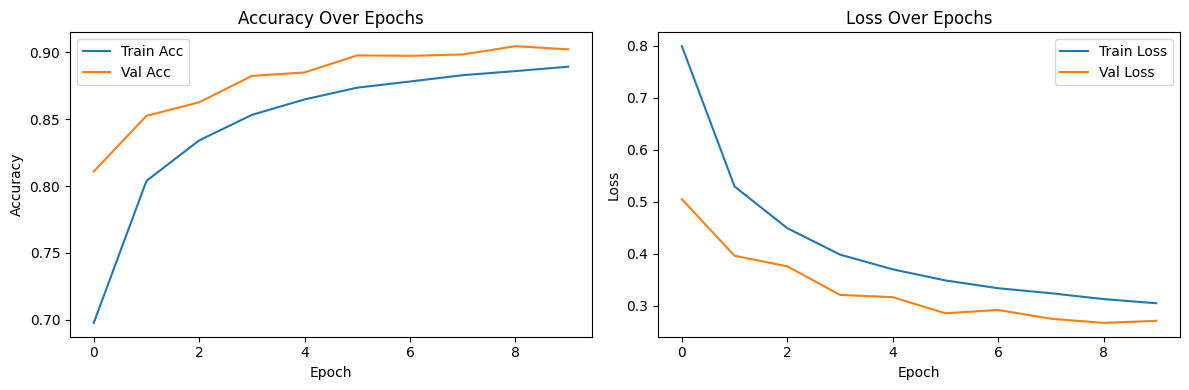


🔍 Predicting: tshirt.png

✅ Predicted class for 'tshirt.png': Bag


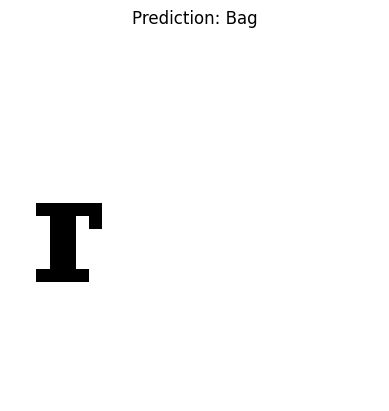


🔍 Predicting: trouser.png

✅ Predicted class for 'trouser.png': Bag


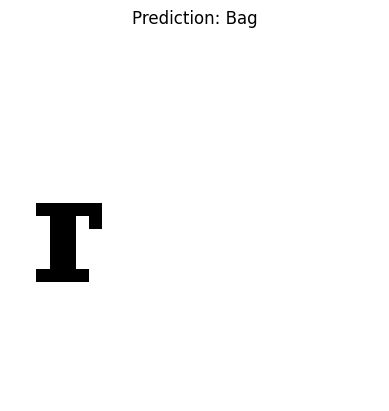


🔍 Predicting: pullover.png

✅ Predicted class for 'pullover.png': Bag


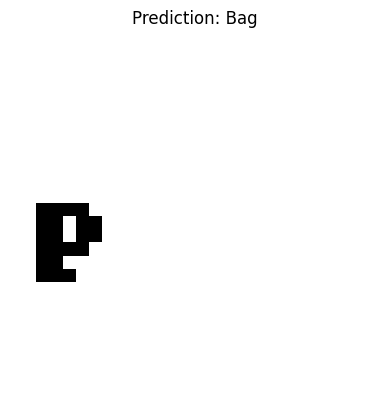


🔍 Predicting: dress.png

✅ Predicted class for 'dress.png': Bag


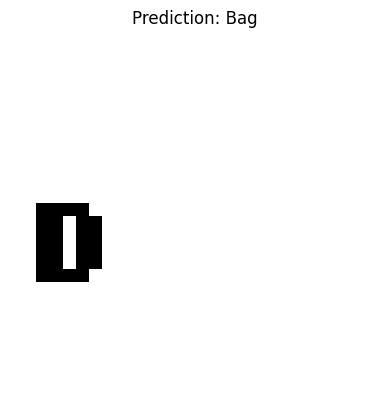


🔍 Predicting: coat.png

✅ Predicted class for 'coat.png': Bag


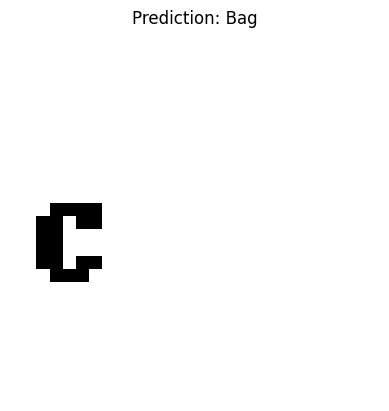


🔍 Predicting: sandal.png

✅ Predicted class for 'sandal.png': Bag


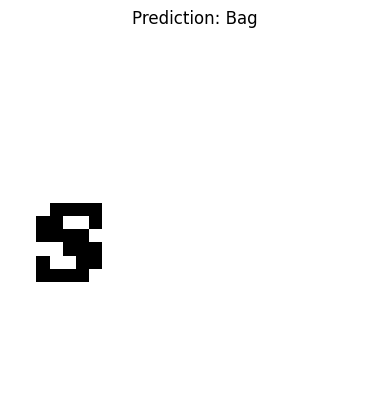


🔍 Predicting: shirt.png

✅ Predicted class for 'shirt.png': Bag


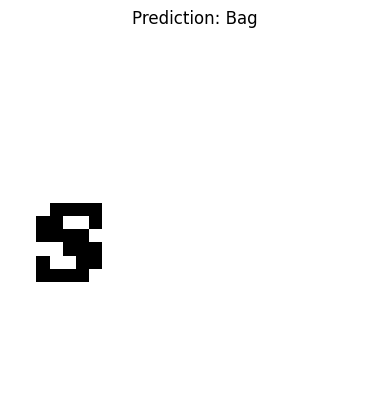


🔍 Predicting: sneaker.png

✅ Predicted class for 'sneaker.png': Bag


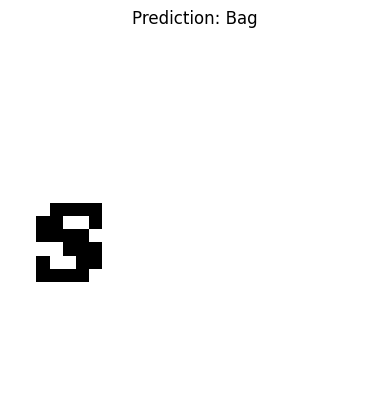


🔍 Predicting: bag.png

✅ Predicted class for 'bag.png': Bag


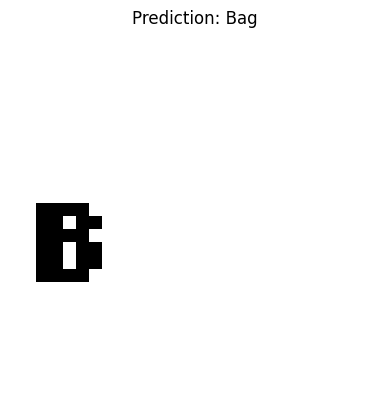


🔍 Predicting: ankleboot.png

✅ Predicted class for 'ankleboot.png': Bag


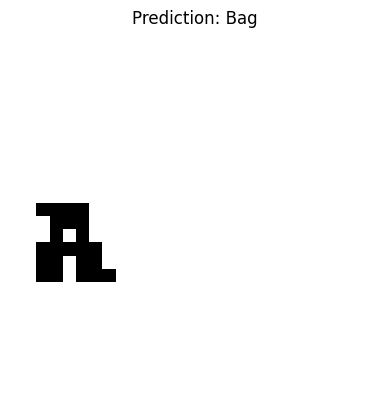

In [12]:
# ✅ CodTech Task 3 - Fashion MNIST with Custom Image Prediction

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from PIL import Image
import matplotlib.pyplot as plt
import os

# Step 1: Load Fashion MNIST Dataset
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(28, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform_train)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform_test)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

class_names = trainset.classes

# Step 2: Define CNN Model
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 3 * 3, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

model = FashionCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 3: Train Model
epochs = 10
train_acc, val_acc, train_loss, val_loss = [], [], [], []

for e in range(epochs):
    model.train()
    correct = total = running_loss = 0
    for imgs, lbls in trainloader:
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, lbls)
        loss.backward()
        optimizer.step()

        _, pred = torch.max(outputs, 1)
        correct += pred.eq(lbls).sum().item()
        total += lbls.size(0)
        running_loss += loss.item()
    train_acc.append(correct / total)
    train_loss.append(running_loss / len(trainloader))

    # Validation
    model.eval()
    correct = total = vloss = 0
    with torch.no_grad():
        for imgs, lbls in testloader:
            outputs = model(imgs)
            loss = criterion(outputs, lbls)
            _, pred = torch.max(outputs, 1)
            correct += pred.eq(lbls).sum().item()
            total += lbls.size(0)
            vloss += loss.item()
    val_acc.append(correct / total)
    val_loss.append(vloss / len(testloader))
    print(f"Epoch {e+1}/{epochs} — loss: {train_loss[-1]:.4f} — acc: {train_acc[-1]:.4f} — val_loss: {val_loss[-1]:.4f} — val_acc: {val_acc[-1]:.4f}")

# Step 4: Final Accuracy
print(f"\n✅ Final Test Accuracy: {val_acc[-1]:.4f}")

# Step 5: Accuracy and Loss Plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train Acc')
plt.plot(val_acc, label='Val Acc')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch"); plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

# Step 6: Custom Image Prediction Function
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def predict_custom_image(filename):
    if not os.path.exists(filename):
        print(f"❌ File '{filename}' not found.")
        return
    try:
        image = Image.open(filename).convert('L')
        image = image.resize((28, 28))
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,))
        ])
        image_tensor = transform(image).unsqueeze(0)
        model.eval()
        with torch.no_grad():
            output = model(image_tensor)
            _, predicted = torch.max(output, 1)
            predicted_class = class_names[predicted.item()]

        print(f"\n✅ Predicted class for '{filename}': {predicted_class}")
        plt.imshow(image, cmap='gray')
        plt.title(f"Prediction: {predicted_class}")
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"⚠️ Error: {e}")

# Step 7: Predict All Images in Folder
test_images = [
    "tshirt.png", "trouser.png", "pullover.png", "dress.png", "coat.png",
    "sandal.png", "shirt.png", "sneaker.png", "bag.png", "ankleboot.png"
]

for file in test_images:
    print(f"\n🔍 Predicting: {file}")
    predict_custom_image(file)
